In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [3]:
df_train = pd.read_csv("../data_train_10568.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.0,59.0,0.0,20.0,477.473684,478.0,1.929506,6.0,-0.157818,-1.011692,585.319886,1.00,9.0,19.0
1,3.0,55.0,0.0,16.0,594.933333,594.0,5.836285,24.0,0.903164,0.702213,210.831175,1.00,16.0,15.0
2,2.0,62.0,0.0,11.0,881.200000,883.0,10.322790,34.0,-0.232495,-0.889146,465.480586,1.00,10.0,10.0
3,3.0,45.0,1.0,18.0,551.294118,550.0,3.063345,10.0,0.703521,-0.556778,1150.860528,1.00,17.0,16.0
4,3.0,87.0,1.0,27.0,358.000000,357.0,6.275716,28.0,0.769334,0.591187,206.938494,0.00,0.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8449,2.0,63.0,0.0,16.0,612.133333,612.0,5.339996,18.0,0.159744,-0.911645,330.473876,1.00,16.0,15.0
8450,3.0,71.0,1.0,18.0,548.823529,548.0,5.490476,22.0,0.368340,0.147264,876.494007,1.00,18.0,17.0
8451,0.0,85.0,1.0,24.0,396.608696,394.0,54.231179,184.0,-0.003158,-1.210829,579.928286,0.75,19.0,7.0
8452,3.0,81.0,0.0,22.0,435.333333,434.0,4.291002,14.0,0.580739,-1.078787,808.453715,1.00,13.0,21.0


In [4]:
x_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

In [5]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)

In [6]:
df_test = pd.read_csv("../data_test_10568.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.0,14.0,1.0,12.0,841.818182,854.0,57.483307,188.0,0.176915,-1.021702,885.983697,1.0,11.0,11.0
1,3.0,63.0,0.0,18.0,512.941176,514.0,1.211251,4.0,-0.681733,-0.495728,442.022205,1.0,12.0,17.0
2,1.0,48.0,0.0,9.0,1067.250000,1062.0,22.292095,60.0,0.085534,-1.618443,690.671641,1.0,9.0,8.0
3,2.0,11.0,1.0,15.0,655.142857,645.0,41.027616,132.0,1.353233,0.619492,908.872186,1.0,15.0,14.0
4,0.0,76.0,1.0,13.0,748.166667,678.0,191.480997,574.0,0.545018,-1.041105,356.313895,1.0,13.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,1.0,53.0,0.0,9.0,1012.000000,1003.0,31.796226,76.0,0.178063,-1.755142,322.490010,1.0,9.0,8.0
2110,2.0,54.0,1.0,10.0,962.000000,1058.0,153.753049,424.0,-0.424497,-1.431526,41.655430,1.0,10.0,9.0
2111,3.0,37.0,0.0,16.0,594.666667,594.0,4.482063,16.0,0.610760,-0.597110,842.298184,1.0,16.0,15.0
2112,1.0,83.0,1.0,8.0,1154.285714,1166.0,28.333293,74.0,-0.391672,-1.513038,207.460549,1.0,8.0,7.0


In [7]:
x_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [8]:
x_test = scale.transform(x_test)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train , test_size=0.5, shuffle=True, stratify=y_train)
print(f"Train: {x_train.shape}")
print(f"Vallidation: {x_val.shape}")

Train: (4227, 13)
Vallidation: (4227, 13)


In [10]:
# Khởi tạo các mô hình con
rf_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 5, max_features= 'sqrt', n_estimators= 100)
ab_clf = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 1000)
knn_clf = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 6, p= 1, weights= 'uniform')
svc_clf = SVC(C= 10, gamma= 'scale', kernel= 'rbf', probability= True)
xgb_clf = XGBClassifier(gamma= 0.1,learning_rate= 0.1,max_depth= 3,min_child_weight= 1,n_estimators= 1000)
dt_clf = DecisionTreeClassifier(criterion= 'gini',max_depth= 5,max_features= 'sqrt',splitter= 'best')

In [11]:
# Huấn luyện các mô hình con
rf_clf.fit(x_train,y_train)
ab_clf.fit(x_train, y_train)
knn_clf.fit(x_train, y_train)
svc_clf.fit(x_train, y_train)
xgb_clf.fit(x_train, y_train)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt')

In [12]:
# Dự đoán trên tập huấn luyện để tạo đặc trưng mới cho mô hình blending
X_train_meta = np.column_stack((
    rf_clf.predict_proba(x_val),
    ab_clf.predict_proba(x_val),
    knn_clf.predict_proba(x_val),
    svc_clf.predict_proba(x_val),
    xgb_clf.predict_proba(x_val),
    dt_clf.predict_proba(x_val)
))
# Dự đoán trên tập kiểm tra để tạo đặc trưng mới cho mô hình blending
X_test_meta = np.column_stack((
    rf_clf.predict_proba(x_test),
    ab_clf.predict_proba(x_test),
    knn_clf.predict_proba(x_test),
    svc_clf.predict_proba(x_test),
    xgb_clf.predict_proba(x_test),
    dt_clf.predict_proba(x_test)
))

In [ ]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(0.001,0.01,10),
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [1,2,3,4],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'n_jobs':[-1],
    'tol':[0.0001,0.001,0.01]
}
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, verbose=5, return_train_score=True,refit=True)
grid_model = grid_search.fit(X_train_meta,y_val)

In [14]:
result_test = grid_model.predict(X_test_meta)

In [15]:
grid_model.best_params_

{'C': 0.009000000000000001,
 'max_iter': 4,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.001}

In [16]:
grid_model.best_score_

0.9373077832978471

In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

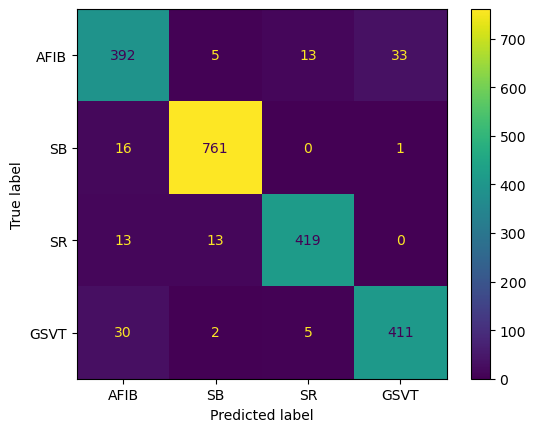

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.947966,0.884876,0.869180,0.876957,0.964692
1,SB,0.982498,0.978149,0.974392,0.976267,0.985030
2,SR,0.979186,0.941573,0.958810,0.950113,0.989215
3,GSVT,0.966414,0.917411,0.923596,0.920493,0.979592
4,macro avg,NaN,0.930958,0.931494,0.930502,NaN
5,micro avg,NaN,0.938032,0.938032,0.938032,NaN
6,weighted avg,NaN,0.938131,0.938299,0.938032,NaN


In [18]:
evaluation_test = evaluation_test(y_test,result_test)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [19]:
df_evaluation_test.to_csv("../Result/Blending_LR_lead2.csv")